In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

x = np.random.gumbel(50, 10, 175)
y = x * 70000
noise = np.random.normal(0, 800000, 175)# + np.random.uniform(-500000, 500000, 875)
y = y + noise



array([ 57.56581053,  38.9801958 ,  47.24836691,  50.91082321,
        67.74165924,  67.7433442 ,  78.16101524,  43.01253095,
        50.84379766,  47.91970036,  88.72835562,  37.46221126,
        44.19781041,  64.32599589,  66.06048718,  65.96465308,
        60.14031106,  52.9581125 ,  55.69979439,  60.66465597,
        50.55120742,  68.95557681,  60.6271774 ,  57.84654719,
        54.96044262,  45.69558735,  65.01768684,  53.2568976 ,
        51.08136898,  80.45682265,  50.66852641,  66.76853892,
        76.99131131,  39.10197136,  37.84900228,  44.97812635,
        60.12559756,  72.75190621,  48.57848946,  55.44570563,
        70.39050483,  53.80459528,  83.52586621,  41.24355075,
        62.0578185 ,  49.17263264,  59.84712566,  53.09095177,
        52.34174421,  65.87732198,  37.49294251,  45.9971805 ,
        39.68562801,  41.88113798,  50.93152655,  40.64128085,
        73.78867408,  65.22642542,  80.73002904,  59.32592672,
        57.09011777,  61.50241082,  44.32099842,  58.18

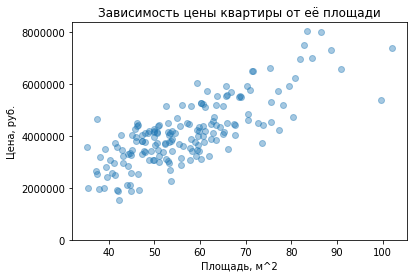

In [84]:
plt.plot(x, y, 'o', alpha=0.4)
plt.yticks(np.arange(0, 10000000, 2000000))
plt.xlabel('Площадь, м^2')
plt.ylabel('Цена, руб.')
plt.title('Зависимость цены квартиры от её площади')
plt.show()

In [86]:
def net_input(W, X, b):
#     assert len(W) == len(X), "len(W) != len(X)"
#     result = 0
#     for i in range(len(X)):
#         result += W[i] * X[i]
#     result += b
    
    return np.dot(W, X) + b

In [87]:
W = [1, 4, 5, 6]
b = 50
dumb_X = [3, 7, 8, 9]
dumb_Y = net_input(W, dumb_X, b)
dumb_Y

175

In [88]:
  def cost_function(Y_hat, Y):
    return np.sum(np.square(Y_hat - Y)) / Y.shape[0]

In [89]:
def cost_function_derivative_w(Y_hat, Y, X):
    return 2 * np.sum((Y_hat - Y) * X) / Y.shape[0]

In [90]:
def cost_function_derivative_b(Y_hat, Y):
    return 2 * np.sum(Y_hat - Y) / Y.shape[0]

In [102]:
W = np.array([0])
b = np.array([0])

LEARNING_RATE = 10e-8
NUM_ITERATIONS = 500

for i in range(0, NUM_ITERATIONS):
    #print('{} step'.format(i))
    y_hat = np.array([net_input(W, [x_single], b) for x_single in x])
#     y_hat = net_input(W, X, b)
#     print('cost function: {}'.format(cost_function(y_hat, Y)))

    W = W - LEARNING_RATE * cost_function_derivative_w(y_hat, y, x)
    b = b - LEARNING_RATE * cost_function_derivative_b(y_hat, y)
    
print(W)
print(b)

[76270.60511589]
[-2485.28854055]


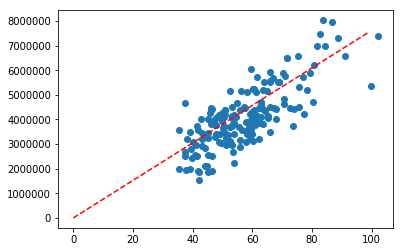

In [103]:
plt.plot(x, y, 'o')
plt.plot(np.arange(0, 100), np.arange(0, 100) * W + b, 'r--')
plt.show()

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
x.reshape(-1, 1).shape


(175, 1)

In [114]:
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
y_pred = model.predict(x.reshape(-1, 1))

In [116]:
y_pred

array([[4168875.6442063 ],
       [2770730.75498604],
       [3392722.62081082],
       [3668239.17611584],
       [4934376.8701993 ],
       [4934503.62442993],
       [5718196.4818974 ],
       [3074072.28371942],
       [3663197.02786161],
       [3443225.19759447],
       [6513148.55422663],
       [2656536.93644321],
       [3163237.61068984],
       [4677425.87198836],
       [4807906.9009978 ],
       [4800697.56344076],
       [4362548.26712648],
       [3822251.14225211],
       [4028500.36059159],
       [4401993.2986755 ],
       [3641186.26586317],
       [5025696.56364467],
       [4399173.887813  ],
       [4189994.69422286],
       [3972880.9522756 ],
       [3275911.26767049],
       [4729459.8876091 ],
       [3844727.92661684],
       [3681068.86760367],
       [5890903.78538258],
       [3650011.85200016],
       [4861171.69381701],
       [5630202.85971855],
       [2779891.59723493],
       [2685634.16515994],
       [3221938.64183606],
       [4361441.41090934],
 

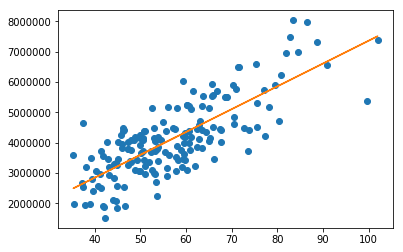

In [118]:
plt.plot(x, y, 'o')
plt.plot(x, y_pred)

In [120]:
model.coef_

array([[75227.26091521]])

In [121]:
model.intercept_

array([-161642.604652])

In [ ]:
# x = x.reshape(1, 175)
# y = y.reshape(1, 175)
# x.shape
# np.array([x, y]).shape
df = pd.DataFrame(np.array([x, y]).T, columns=['X1', 'X2'])